# Download emissions data using a Dukems URL

The Dukems download page (https://dukems-app.test-datalabs.nerc.ac.uk/app/download) allows you to download emissions data and also get a copy of the download url for your own use.  This url specifies which pollutant you want, and also additional filters such as Snap Sector, region of interest and date range.
Dukems download URLs can be obtained from https://dukems-app.test-datalabs.nerc.ac.uk/app/download.

This notebook shows how to use this url to simply download the data and display it.  It doesn't necessarily demonstrate best practice, but is written to be simple and help you think about how you might automate and integrate it into your own code.

The URL can be written programatically, but other notebooks will cover that as well as additional helper services provided by the Dukems API.

### Install dependencies and import libraries

In [14]:
!pip install xarray
!pip install netCDF4

import requests
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import io
import re
import os
import warnings
from PIL import Image

# For clarity, turn off warnings
warnings.filterwarnings('ignore')

### Download the data using a Dukems Url
The url can obtained from https://dukems-app.test-datalabs.nerc.ac.uk/app/download.
Download the data and save using the filename found in the header of the response.

In [20]:
url = input("Enter a UKEMS emissions download URL")

# Example url
# url = 'https://dukems-app.test-datalabs.nerc.ac.uk/api/download/dataset/5/7/0/0?startYear=2020&endYear=2030&y2=238954&y1=114353&x2=633171&x1=461485'

r = requests.get(url, verify=False, allow_redirects=True)
filename = re.findall('filename=(.+)', r.headers.get('content-disposition'))[0]
open(filename, 'wb').write(r.content)
print(f'Downloaded the file {filename} ({os.path.getsize(filename)} bytes)')

Enter a UKEMS emissions download URL https://dukems-app.test-datalabs.nerc.ac.uk/api/download/dataset/5/7/0/0?startYear=2020&endYear=2030&y2=238954&y1=114353&x2=633171&x1=461485


Downloaded the file 059b6345-8188-49ab-a2e7-0c791c370f1c.nc (958183 bytes)


### Open the downloaded data and view metadata

In [4]:
with xr.open_dataset(filename) as ds:
    print('The dimensions and variables in the data:')
    print(ds.dims)
    print(ds.data_vars)
    print(ds.variables['Time'].data)


The dimensions and variables in the data:
Frozen({'x': 172, 'y': 125, 'Time': 11})
Data variables:
    emissions_data  (Time, y, x) float32 ...
[2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030]


### Plot a time series for a location in the downloaded data.

The downloaded data is for a region around central London.  The centre of London has the British National Grid coordinate: 530034,180381.  Putting a 1km box around this coordinate, will restrict the data to nearest 1km square in the data.  Its annual emissions can then be plotted.

Time series for central London:


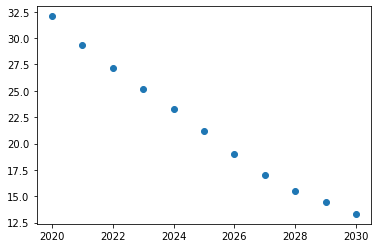

In [5]:
    london_x = 530034
    london_y = 180381
    dataForCentralLondon = ds.sel(x=slice(london_x-500,london_x+500), y=slice(london_y+500,london_y-500))
    emissions = dataForCentralLondon['emissions_data'].data.flatten()
    years =dataForCentralLondon['Time'].data

    print('Time series for central London:')
    plt.scatter(years, emissions)
    plt.show()


### View some data

Lossy conversion from float32 to uint8. Range [1.3144001059117727e-05, 50.48596954345703]. Convert image to uint8 prior to saving to suppress this warning.


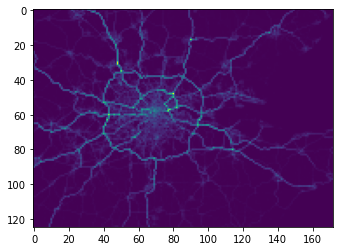

In [19]:
data = ds.loc[dict(Time=2023)]['emissions_data'].data
imageio.imwrite('mapish.png', data)
im = Image.open("mapish.png")
img=mpimg.imread('mapish.png')
plt.imshow(img)